<a href="https://colab.research.google.com/github/FrancescoMonaco/MultiDimMotifDiscovery/blob/main/Thesis_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Motif Discovery - Extra Files
The file offers cells to replicate each figure or table found in the thesis.

In [ ]:
%%capture
#@title Basics, imports
!pip install numpy scikit-learn datasketch scipy
!pip install stumpy NearPy
%matplotlib inline
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from numba import cuda
from tqdm import tqdm
import multiprocessing as mp
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 8.4 MB/s eta 0:00:00


#Thesis Plots

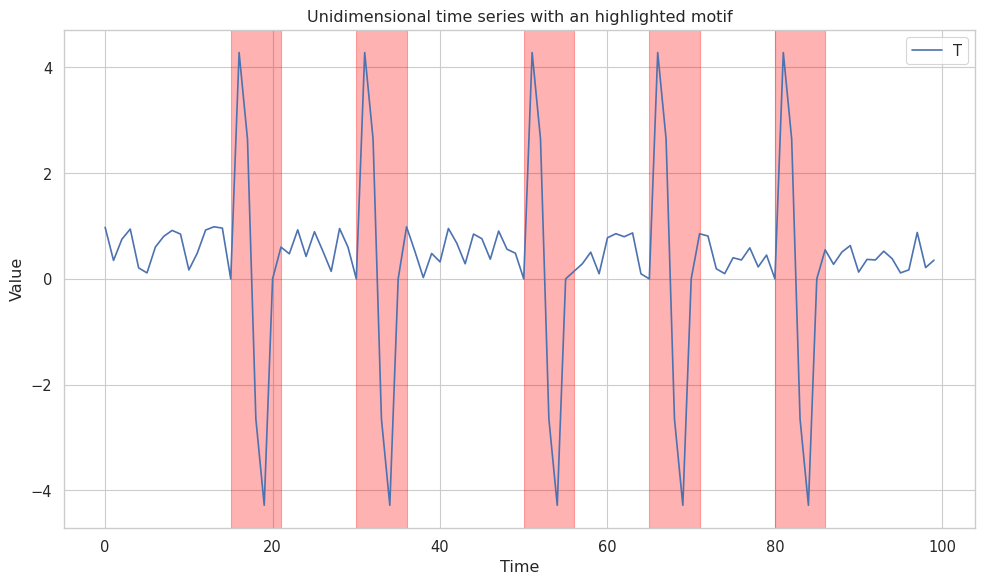

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stumpy import stump

# Set seaborn style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Create sample timeseries
timeseries = np.random.rand(100)
timeseries = timeseries.astype(float)

# Plant motifs at specific locations
motif_length = 6
motif = 4.5 * np.sin(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries[loc:loc+motif_length] = motif

m = 6
# Calculate matrix profile and find motif
mp = stump(timeseries, m=m)

# Plot the entire timeseries with planted motifs highlighted using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeseries, label="T")
plt.title("Unidimensional time series with an highlighted motif")
plt.xlabel("Time")
plt.ylabel("Value")

# Highlight planted motifs using rectangles
for motif_idx in motif_locations:
    plt.axvspan(motif_idx, motif_idx + motif_length, color='red', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()


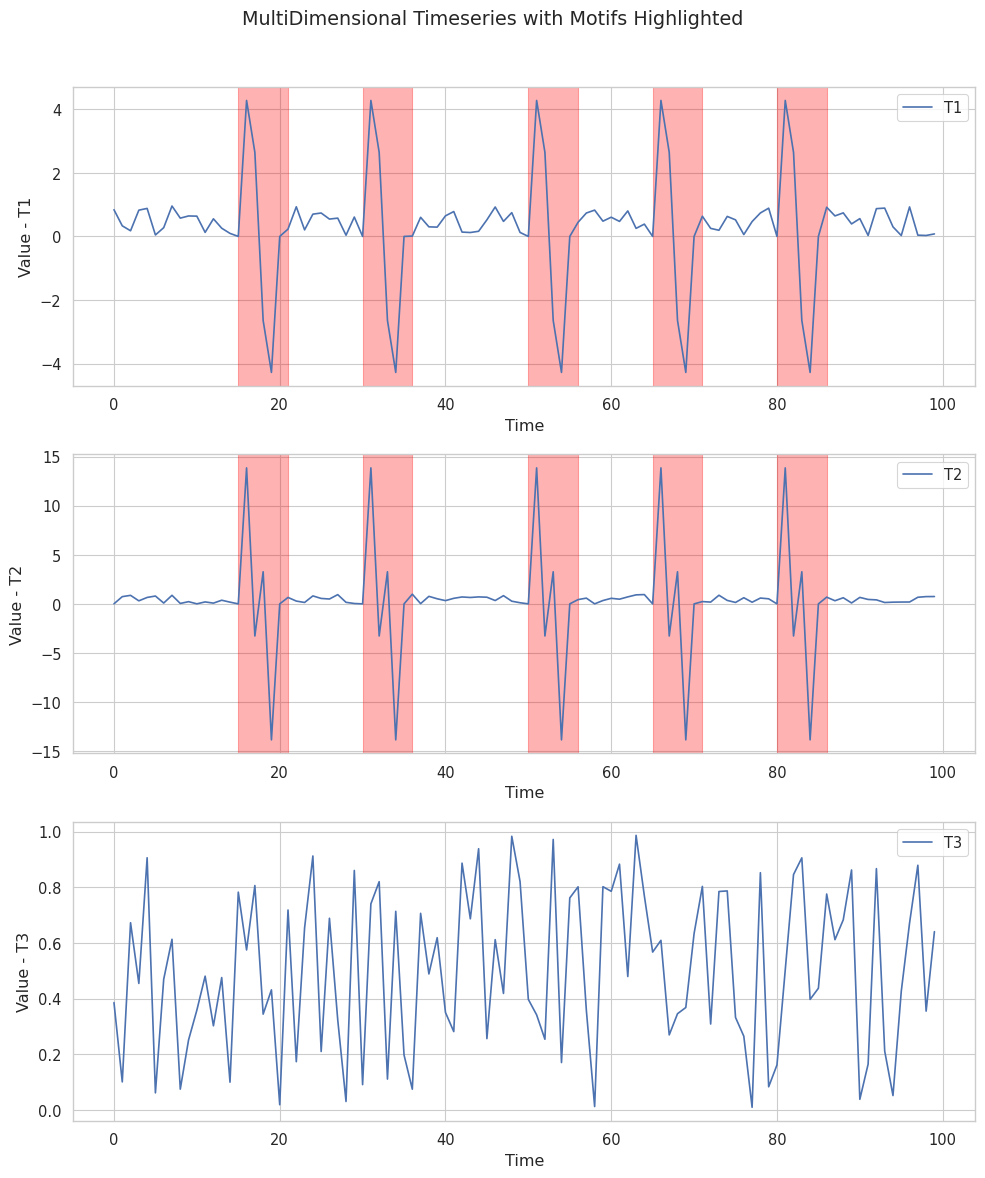

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stumpy import mstump

# Set seaborn style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Create sample 3-dimensional timeseries
timeseries_3d = np.random.rand(100, 3)
timeseries_3d[:, 0] = timeseries  # One dimension is the same as the unidimensional time series

# Plant motifs at specific locations in the second dimension
motif_length = 6
motif = 4.5 * np.tan(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations in the second dimension
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries_3d[loc:loc+motif_length, 1] = motif

# The third dimension is just noise
timeseries_3d[:, 2] = np.random.rand(100)

m = 6
df = pd.DataFrame(timeseries_3d, columns=['T1', 'T2', 'T3'])
# Calculate matrix profile and find motifs for the first 2 dimensions
mp, indices = mstump(df, m=m)

# Plot 3 subplots, one for each dimension, and highlight motifs with rectangles
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

for i, dimension in enumerate(['T1', 'T2', 'T3']):
    axs[i].plot(df[dimension], label=dimension)

    # Highlight motifs using rectangles
    for motif_idx in motif_locations:
        if(i==2): break
        axs[i].axvspan(motif_idx, motif_idx + motif_length, color='red', alpha=0.3)

    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
!pip install pyts
from pyts.approximation import PiecewiseAggregateApproximation
from pyts.approximation import SymbolicAggregateApproximation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.6 MB/s eta 0:00:00


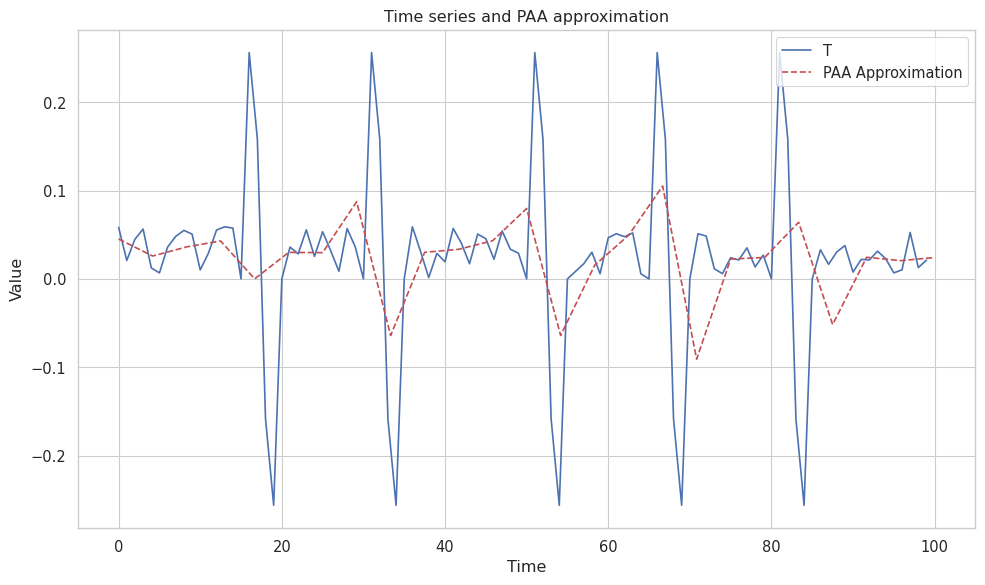

In [ ]:
paa = PiecewiseAggregateApproximation(window_size=4)
timeseries = timeseries/np.linalg.norm(timeseries) + 1e-16
t_in = timeseries.reshape(1,-1)
X_paa = paa.transform(t_in)

n_points = len(timeseries)
window_size = 5
new_x = np.linspace(0, n_points, 25)

# Plot original time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeseries, label="T")

# Plot PAA approximation dashed
plt.plot(new_x, X_paa.flatten(), 'r--', label="PAA Approximation")

plt.title("Time series and PAA approximation")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
sax = SymbolicAggregateApproximation(n_bins=7)
X_sax = sax.fit_transform(X_paa)

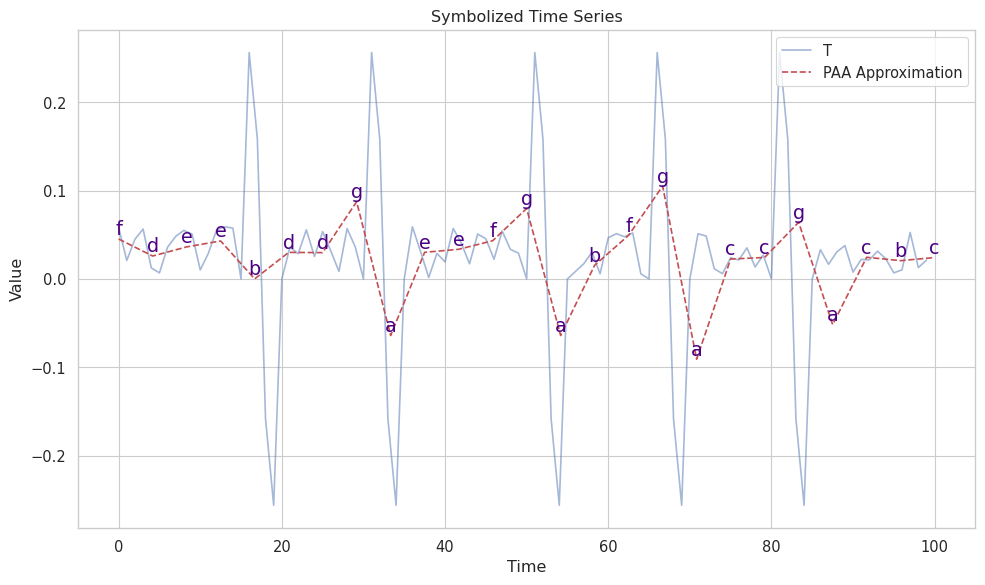

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeseries, label="T", alpha=0.5 )

# Plot PAA approximation dashed
plt.plot(new_x, X_paa.flatten(), 'r--', label="PAA Approximation")
for i, (x, sax_value,y) in enumerate(zip(new_x, X_sax.flatten(), X_paa.flatten())):
    plt.text(x, y, sax_value, ha='center', va='bottom', color='indigo', fontsize='large')

plt.title("Symbolized Time Series")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.tight_layout()
plt.show()